In [1]:
import utils
import pandas as pd
import numpy as np

alerts, jams = utils.load_data()

In [2]:
alerts.shape

(11250, 16)

In [3]:
alerts.head()

,country,city,reportRating,reportByMunicipalityUser,confidence,reliability,type,uuid,roadType,magvar,subtype,street,location,pubMillis,endreport,reportDescription
0,CI,Antofagasta,1,false,5,10,HAZARD,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,6.0,17,HAZARD_ON_ROAD_CONSTRUCTION,Av. República de Croacia,"{'x': -70.412429, 'y': -23.676846}",1724417637000,1.724425e+12,NaN
1,CI,Antofagasta,0,false,0,5,JAM,1d8df954-e380-4327-8015-f4fbadf74f2d,6.0,4,JAM_HEAVY_TRAFFIC,Av. Edmundo Pérez Zujovic,"{'x': -70.392283, 'y': -23.617475}",1724423878000,1.724425e+12,NaN
2,CI,Antofagasta,0,false,0,5,JAM,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,1.0,359,,Pasaje El Volcán,"{'x': -70.385619, 'y': -23.573323}",1724425406000,1.724425e+12,NaN
3,CI,Antofagasta,1,false,0,5,JAM,53b6ff5f-d078-421d-9f78-03e534d78989,2.0,1,,Azapa,"{'x': -70.384986, 'y': -23.616328}",1724425622000,1.724425e+12,NaN
4,CI,Antofagasta,2,false,0,5,ACCIDENT,e87552f7-4572-4096-9fdd-9400ad90e7f8,2.0,281,,Irarrázaval,"{'x': -70.385121, 'y': -23.603942}",1724425939000,1.724425e+12,NaN


In [4]:
alerts_cleaned = utils.extract_event(alerts, ["JAM", "ACCIDENT"], extra_col=['type']).drop('uuid', axis=1)
alerts_cleaned['day'] = alerts_cleaned.inicio.dt.day
alerts_cleaned['month'] = alerts_cleaned.inicio.dt.month
alerts_cleaned['year'] = alerts_cleaned.inicio.dt.year
alerts_cleaned['minute'] = alerts_cleaned.inicio.dt.minute
alerts_cleaned = alerts_cleaned.drop(['inicio', 'fin', 'geometry'], axis=1)

alerts_cleaned.head()

,street,x,y,type,hour,week_day,day_type,day,month,year,minute
1,Av. Edmundo Pérez Zujovic,-70.392283,-23.617475,JAM,10,4,s,23,8,2024,37
2,Pasaje El Volcán,-70.385619,-23.573323,JAM,11,4,s,23,8,2024,3
3,Azapa,-70.384986,-23.616328,JAM,11,4,s,23,8,2024,7
4,Irarrázaval,-70.385121,-23.603942,ACCIDENT,11,4,s,23,8,2024,12
5,Coquimbo,-70.399240,-23.657366,JAM,11,4,s,23,8,2024,40


In [5]:
alerts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 1 to 11248
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   street    7963 non-null   object 
 1   x         7995 non-null   float64
 2   y         7995 non-null   float64
 3   type      7995 non-null   object 
 4   hour      7995 non-null   int32  
 5   week_day  7995 non-null   int32  
 6   day_type  7995 non-null   object 
 7   day       7995 non-null   int32  
 8   month     7995 non-null   int32  
 9   year      7995 non-null   int32  
 10  minute    7995 non-null   int32  
dtypes: float64(2), int32(6), object(3)
memory usage: 562.1+ KB


In [6]:
print(f"{len(alerts_cleaned[alerts_cleaned['street'].isna()]) / len(alerts_cleaned['street']) * 100:.2f}% de lo datos es nulos en 'street'")

0.40% de lo datos es nulos en 'street'


In [7]:
alerts_cleaned["street"].value_counts()[:10]

street
Av. Edmundo Pérez Zujovic    1981
Av. Pedro Aguirre Cerda       689
Av. Grecia                    567
Av. Antonio Rendic            395
Av. Iquique                   385
Av. Balmaceda                 258
Nicolás Tirado                191
Av. Argentina                 161
Av. Óscar Bonilla             139
Av. Séptimo de Línea          133
Name: count, dtype: int64

In [8]:
alerts_cleaned["street"].value_counts().index[:10]

Index(['Av. Edmundo Pérez Zujovic', 'Av. Pedro Aguirre Cerda', 'Av. Grecia',
       'Av. Antonio Rendic', 'Av. Iquique', 'Av. Balmaceda', 'Nicolás Tirado',
       'Av. Argentina', 'Av. Óscar Bonilla', 'Av. Séptimo de Línea'],
      dtype='object', name='street')

In [9]:
# Eliminamos valores nulos y filtro por calle

streets = alerts_cleaned["street"].value_counts().index[:10].to_numpy()

alerts_cleaned = alerts_cleaned[alerts_cleaned['street'].apply(lambda x: x in streets)]
alerts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4899 entries, 1 to 11248
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   street    4899 non-null   object 
 1   x         4899 non-null   float64
 2   y         4899 non-null   float64
 3   type      4899 non-null   object 
 4   hour      4899 non-null   int32  
 5   week_day  4899 non-null   int32  
 6   day_type  4899 non-null   object 
 7   day       4899 non-null   int32  
 8   month     4899 non-null   int32  
 9   year      4899 non-null   int32  
 10  minute    4899 non-null   int32  
dtypes: float64(2), int32(6), object(3)
memory usage: 344.5+ KB


In [10]:
cat = ["street", "type", "day_type"]
num = list(alerts_cleaned.drop(cat, axis=1).columns)

## Balanceo de eventos (creación de no-eventos ficticios)

In [11]:
# Balanceo de eventos y creación de no eventos

events = alerts_cleaned.copy()
events['happen'] = 1

q_events = len(events)

street = events['street']
x = events['x']
y = events['y']
type = np.random.choice(["ACCIDENT", "JAM"], q_events)
hour = np.random.randint(events.hour.min(), events.hour.max(), q_events)
minute = np.random.randint(events.minute.min(), events.minute.max(), q_events)
week_day = np.random.randint(events.week_day.min(), events.week_day.max(), q_events)
day_type = np.random.choice(["s", "f"], q_events)
day = np.random.randint(events.day.min(), events.day.max() + 1, q_events)
month = np.random.randint(events.month.min(), events.month.max() + 1, q_events)
year = np.random.choice(events.year.unique(), q_events)


no_events = pd.DataFrame({
    "street": street,
    "x": x,
    "y": y,
    "type": type,
    "hour": hour,
    "minute": minute,
    "week_day": week_day,
    "day_type": day_type,
    "day": day,
    "month": month,
    "year": year,
    "happen": 0
})

no_events

,street,x,y,type,hour,minute,week_day,day_type,day,month,year,happen
1,Av. Edmundo Pérez Zujovic,-70.392283,-23.617475,JAM,21,32,5,f,17,10,2024,0
7,Av. Grecia,-70.402438,-23.650212,ACCIDENT,17,47,3,s,29,10,2024,0
8,Av. Grecia,-70.402429,-23.649991,ACCIDENT,20,11,4,f,25,8,2024,0
9,Av. Balmaceda,-70.400096,-23.645631,ACCIDENT,14,25,3,f,31,9,2024,0
11,Av. Balmaceda,-70.401486,-23.647052,JAM,5,56,5,s,13,8,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11235,Av. Séptimo de Línea,-70.395851,-23.639444,ACCIDENT,4,40,4,f,2,9,2024,0
11236,Av. Óscar Bonilla,-70.379574,-23.577957,ACCIDENT,7,29,4,s,10,10,2024,0
11246,Av. Edmundo Pérez Zujovic,-70.395894,-23.631707,JAM,6,54,1,s,15,10,2024,0
11247,Av. Edmundo Pérez Zujovic,-70.396271,-23.628936,JAM,4,14,1,s,26,8,2024,0


In [12]:
total_events = pd.concat([events, no_events], axis=0)
total_events['happen'].value_counts()

happen
1    4899
0    4899
Name: count, dtype: int64

## Ocurrencia de evento

In [13]:
# Se elimina mes y año porque no hay muestras suficientes

X_happen = total_events.drop(['happen', "type", "x", "y", "street", "month", "year"], axis=1)
y_happen = total_events['happen']

In [14]:
dt = {"f": 0, "s": 1}

X_happen["day_type"] = X_happen["day_type"].map(dt)


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train_happen, X_test_happen, y_train_happen, y_test_happen = train_test_split(X_happen, y_happen, test_size=0.2, random_state=42)

rfc_happen = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, min_samples_split=5, n_estimators=100)
rfc_happen.fit(X_train_happen, y_train_happen)

y_predict_happen = rfc_happen.predict(X_test_happen)

In [16]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

confusion_matrix(y_test_happen, y_predict_happen)

array([[814, 164],
       [ 33, 949]])

In [17]:
recall = recall_score(y_test_happen, y_predict_happen)
precision = precision_score(y_test_happen, y_predict_happen)
f1 = f1_score(y_test_happen, y_predict_happen)

recall, precision, f1

(np.float64(0.9663951120162932),
 np.float64(0.8526504941599281),
 np.float64(0.9059665871121718))

In [18]:
# Un dato de prueba

test = {
    "hour": [7],
    "week_day": [4],
    "day_type": [1],
    "day": [11],
    "minute": [20]
}

rfc_happen.predict_proba(pd.DataFrame(test)), rfc_happen.predict(pd.DataFrame(test))


(array([[0.08236032, 0.91763968]]), array([1]))

In [19]:
from sklearn.model_selection import cross_val_score

cve_rfc_happen = cross_val_score(rfc_happen, X_happen, y_happen, cv=10)
cve_rfc_happen

array([0.72857143, 0.56326531, 0.8122449 , 0.84897959, 0.54897959,
       0.57142857, 0.69693878, 0.81734694, 0.86414709, 0.81307457])

In [20]:
mean_cve_rfc_happen = np.mean(cve_rfc_happen)
mean_cve_rfc_happen

np.float64(0.7264976756790561)

## Tipo de evento

In [21]:
X_type = events.drop(["happen", "month", "year", "x", "y", "type", "street"], axis=1)
y_type = events["type"]

In [22]:
X_type["day_type"] = X_type["day_type"].map(dt)

In [23]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le_type = LabelEncoder()
y_type = le_type.fit_transform(y_type)



In [24]:
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

In [25]:
rfc_type = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, class_weight="balanced", min_samples_split=10, max_samples=20)
rfc_type.fit(X_train_type, y_train_type)

y_predict_type = rfc_type.predict(X_test_type)

In [26]:
cve_rfc_type = cross_val_score(rfc_type, X_type, y_type, cv=10)
cve_rfc_type

array([0.89183673, 0.89183673, 0.88979592, 0.88979592, 0.88979592,
       0.88979592, 0.88979592, 0.88979592, 0.88979592, 0.89161554])

In [27]:
mean_cve_rfc_type = np.mean(cve_rfc_type)
mean_cve_rfc_type

np.float64(0.8903860439881475)

In [28]:
confusion_matrix(y_test_type, y_predict_type)

array([[  0, 110],
       [  0, 870]])

In [29]:
recall = recall_score(y_test_type, y_predict_type)
precision = precision_score(y_test_type, y_predict_type)
f1 = f1_score(y_test_type, y_predict_type)

recall, precision, f1

(np.float64(1.0),
 np.float64(0.8877551020408163),
 np.float64(0.9405405405405406))

In [30]:
events['type'].value_counts()

type
JAM         4362
ACCIDENT     537
Name: count, dtype: int64

## Calle de evento

In [31]:
X_street = events.drop(["happen", "month", "year", "x", "y", "street"], axis=1)
y_street = events['street']

In [32]:
le_street = LabelEncoder()

for c in cat:
    if c in X_street.columns:
        X_street[c] = le_street.fit_transform(X_street[c])

y_street = le_street.fit_transform(y_street)

In [33]:
sm_street = SMOTE(random_state=42)

X_street_resampled, y_street_resampled = sm_street.fit_resample(X_street, y_street)

X_train_street, X_test_street, y_train_street, y_test_street = train_test_split(X_street_resampled, y_street_resampled, test_size=0.2, random_state=42)
rfc_street = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
rfc_street.fit(X_train_street, y_train_street)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
y_predict_street = rfc_street.predict(X_test_street)

In [35]:
cve_rfc_street = cross_val_score(rfc_street, X_street, y_street, cv=10)
cve_rfc_street

array([0.29795918, 0.09591837, 0.1       , 0.13877551, 0.10204082,
       0.1122449 , 0.07346939, 0.03877551, 0.13265306, 0.18200409])

In [36]:
mean_cve_rfc_street = np.mean(cve_rfc_street)
mean_cve_rfc_street

np.float64(0.12738408246734276)

In [37]:
confusion_matrix(y_test_street, y_predict_street)

array([[282,  16,   8,  28,  20,  14,  18,  13,   5,   8],
       [ 14, 325,   7,   8,   6,   9,   3,   6,   9,   4],
       [  9,   3, 314,  10,  17,   8,   9,  17,   5,   4],
       [ 29,  21,  18, 132,  36,  34,  49,  23,  28,  20],
       [ 14,  14,  23,  29, 227,  23,  18,  10,   4,   6],
       [ 19,  14,  14,  30,  16, 274,  14,  14,   3,   9],
       [ 23,  17,   7,  40,  17,  11, 256,   7,  16,  16],
       [  8,   3,  17,  13,  16,   5,   9, 329,   2,   4],
       [  9,   4,  12,  13,  11,   8,   6,   3, 325,   5],
       [ 10,   6,   8,  12,   6,  10,   8,  10,   5, 311]])

In [38]:
recall = recall_score(y_test_street, y_predict_street, average='weighted')
precision = precision_score(y_test_street, y_predict_street, average='weighted')
f1 = f1_score(y_test_street, y_predict_street, average='weighted')

recall, precision, f1

(np.float64(0.7004038364462393),
 np.float64(0.6935455625424202),
 np.float64(0.6961746451422264))

In [39]:
# Un dato de prueba

happen = ["No ocurre", "Ocurre"]

test = {
    "hour": [7],
    "week_day": [4],
    "day_type": [1],
    "day": [10],
    "minute": [20]
}

rfc_happen.predict_proba(pd.DataFrame(test)), happen[rfc_happen.predict(pd.DataFrame(test))[0]]


(array([[0.12485112, 0.87514888]]), 'Ocurre')

In [40]:
rfc_type.predict_proba(pd.DataFrame(test)), le_type.classes_[rfc_type.predict(pd.DataFrame(test))][0]

(array([[0.21616135, 0.78383865]]), 'JAM')

In [41]:
test_street = pd.concat([pd.DataFrame({"type": [rfc_type.predict(pd.DataFrame(test))[0]]}), pd.DataFrame(test)], axis = 1)

In [42]:
rfc_street.predict_proba(pd.DataFrame(test_street)), le_street.classes_[rfc_street.predict(pd.DataFrame(test_street))[0]]

(array([[0.34338447, 0.01      , 0.        , 0.18      , 0.        ,
         0.        , 0.41661553, 0.        , 0.05      , 0.        ]]),
 'Av. Pedro Aguirre Cerda')

Ocurrirá un evento tipo JAM en Av. Edmundo Pérez Zujovic el 10 de Octubre a las 7:20.

In [43]:
# Distribución de probabilidad de evento durante el día

prob_pred_rfc = []

for h in range(0, 24):
    for m in range(0, 60):
        pred = rfc_happen.predict_proba(pd.DataFrame({
                "hour": [h],
                "week_day": [4],
                "day_type": [1],
                "day": [8],
                "minute": [m]
            }))
        prob_pred_rfc.append(pred[0][1])

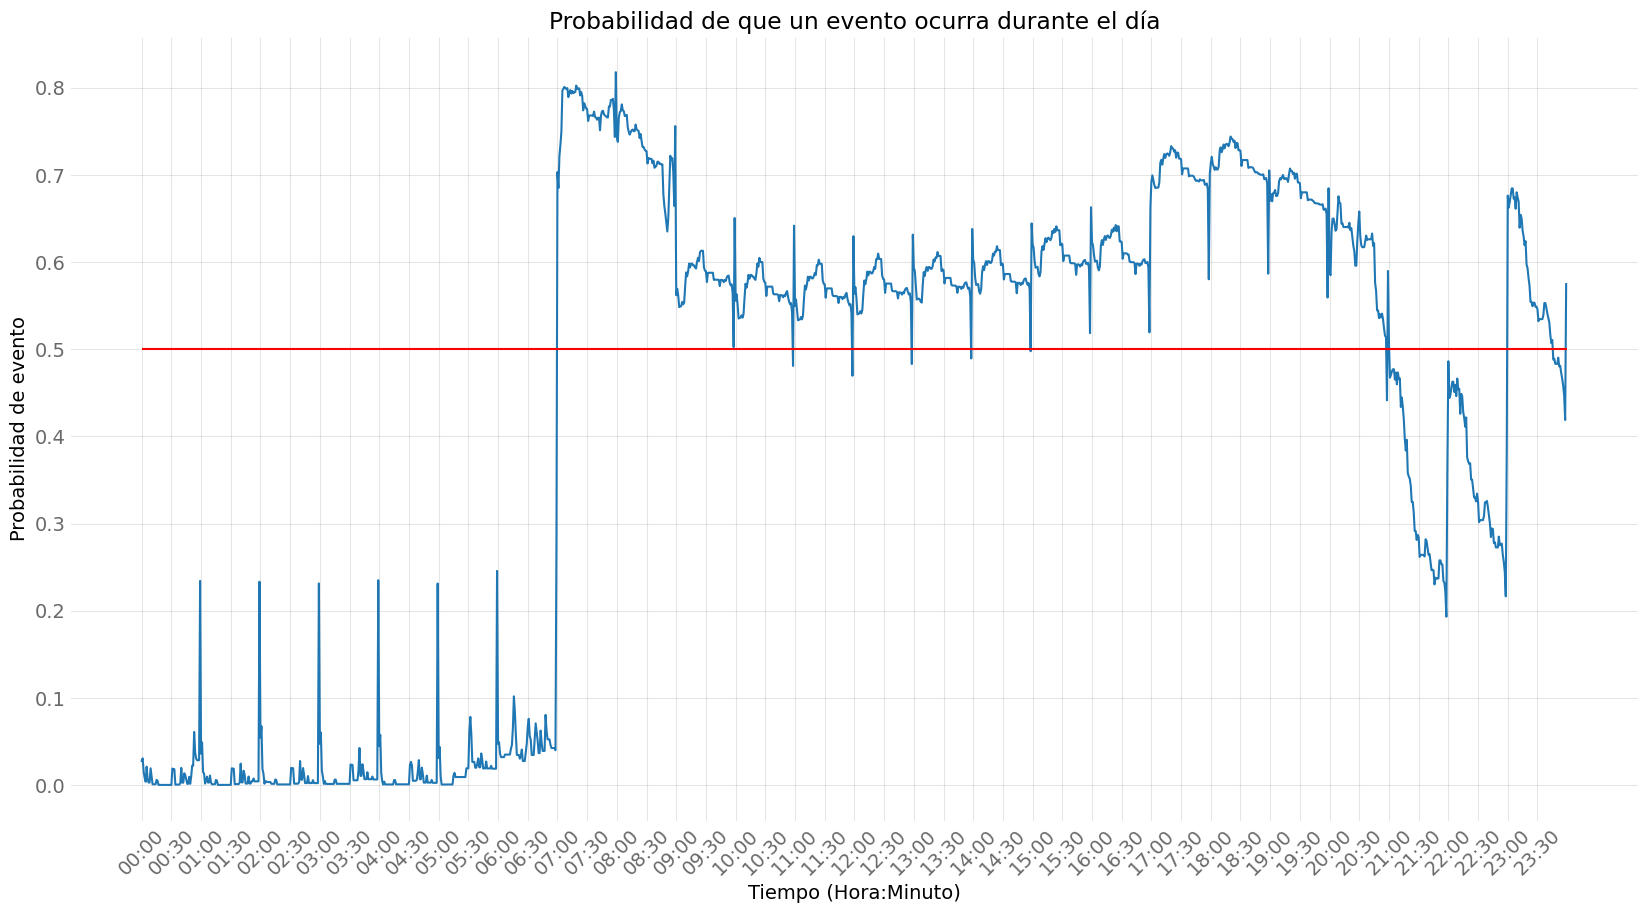

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Crear la lista de etiquetas de horas y minutos cada media hora
xticks_labels = [f"{h:02}:{m:02}" for h in range(24) for m in [0, 30]]

# Crear los índices para las etiquetas cada media hora (cada 30 minutos son 2 puntos por hora)
xticks_positions = np.arange(0, len(prob_pred_rfc), 30)

plt.plot(prob_pred_rfc)
plt.hlines(0.5, 0, len(prob_pred_rfc), colors="r")
plt.xticks(xticks_positions, xticks_labels, rotation=45)

# Mostrar el gráfico
plt.xlabel("Tiempo (Hora:Minuto)")
plt.ylabel("Probabilidad de evento")
plt.title("Probabilidad de que un evento ocurra durante el día")
plt.show()

## MLP happen

In [45]:
from sklearn.neural_network import MLPClassifier

mlp_happen = MLPClassifier(activation="tanh", random_state=42, learning_rate_init=0.01, max_iter=300, hidden_layer_sizes=(40,))

mlp_happen.fit(X_train_happen, y_train_happen)


MLPClassifier(activation='tanh', hidden_layer_sizes=(40,),
              learning_rate_init=0.01, max_iter=300, random_state=42)

In [46]:
y_predict_happen_mlp = mlp_happen.predict(X_test_happen)

In [47]:
confusion_matrix(y_predict_happen_mlp, y_test_happen)

array([[737,  54],
       [241, 928]])

In [48]:
recall = recall_score(y_predict_happen_mlp, y_test_happen)
precision = precision_score(y_predict_happen_mlp, y_test_happen)
f1 = f1_score(y_predict_happen_mlp, y_test_happen)

recall, precision, f1

(np.float64(0.7938408896492729),
 np.float64(0.945010183299389),
 np.float64(0.8628544862854486))

RandomForest


(np.float64(0.9592592592592593),
 np.float64(0.8345864661654135),
 np.float64(0.8925904652498564))

In [49]:
cve_mlp_happen = cross_val_score(mlp_happen, X_happen, y_happen, cv=10)
cve_mlp_happen

/Users/richard/Documents/Developer/antofTraffic/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.67040816, 0.82857143, 0.43163265, 0.5755102 , 0.44285714,
       0.59693878, 0.87857143, 0.44693878, 0.6557712 , 0.4473953 ])

In [50]:
mean_cve_mlp_happen = np.mean(cve_mlp_happen)
mean_cve_mlp_happen

np.float64(0.5974595067853494)

## MLP Type

In [51]:
mlp_type = MLPClassifier(activation="logistic", random_state=42, learning_rate_init=0.01, max_iter=300, hidden_layer_sizes=(40,))

mlp_type.fit(X_train_type, y_train_type)
y_predict_type_mlp = mlp_type.predict(X_test_type)

In [52]:
confusion_matrix(y_predict_type_mlp, y_test_type)

array([[  9,   4],
       [101, 866]])

In [53]:
recall = recall_score(y_predict_type_mlp, y_test_type)
precision = precision_score(y_predict_type_mlp, y_test_type)
f1 = f1_score(y_predict_type_mlp, y_test_type)

recall, precision, f1

(np.float64(0.8955532574974147),
 np.float64(0.9954022988505747),
 np.float64(0.9428415895481764))

Random Forest

(np.float64(1.0),
 np.float64(0.8952496954933008),
 np.float64(0.9447300771208226))

In [54]:
cve_mlp_type = cross_val_score(mlp_type, X_type, y_type, cv=10)
cve_mlp_type

array([0.89795918, 0.90204082, 0.87755102, 0.89387755, 0.89183673,
       0.89183673, 0.88979592, 0.88571429, 0.89387755, 0.89161554])

In [55]:
mean_cve_mlp_type = np.mean(cve_mlp_type)
mean_cve_mlp_type

np.float64(0.8916105337840656)

## MLP Street

In [56]:
mlp_street = MLPClassifier(activation="tanh", random_state=42, learning_rate_init=0.01, max_iter=300, hidden_layer_sizes=(300,))

mlp_street.fit(X_train_street, y_train_street)
y_predict_street_mlp = mlp_street.predict(X_test_street)

In [57]:
confusion_matrix(y_predict_street_mlp, y_test_street)

array([[243,  85,  49, 128, 117, 119, 137,  58,  43,  46],
       [ 13, 181,   8,  17,  15,  12,  19,  10,  16,  19],
       [ 28,  15, 230,  48,  25,  47,  24,  55,  23,  32],
       [  5,   3,   5,  29,   9,   7,  20,   4,   0,   1],
       [ 26,  15,  20,  39, 124,  25,  45,  18,  10,  14],
       [ 30,  34,  17,  47,  29, 140,  30,  25,  19,  16],
       [  9,   0,   2,   9,   4,   7,  66,   5,   3,   4],
       [  9,  15,  27,  23,  14,  17,  17, 215,  13,   6],
       [ 22,  23,   9,  22,   8,  15,  21,  11, 244,   3],
       [ 27,  20,  29,  28,  23,  18,  31,   5,  25, 245]])

In [58]:
recall = recall_score(y_predict_street_mlp, y_test_street, average="weighted")
precision = precision_score(y_predict_street_mlp, y_test_street, average="weighted")
f1 = f1_score(y_predict_street_mlp, y_test_street, average="weighted")

recall, precision, f1

(np.float64(0.43336698637051996),
 np.float64(0.5128430897570531),
 np.float64(0.4455755751556007))

Random Forest

(np.float64(0.7139053254437869),
 np.float64(0.7062531483583431),
 np.float64(0.7086289747169453))

In [59]:
cve_mlp_street = cross_val_score(mlp_street, X_street, y_street, cv=10)
cve_mlp_street

array([0.40204082, 0.4122449 , 0.13265306, 0.2755102 , 0.29795918,
       0.39387755, 0.35918367, 0.14081633, 0.28979592, 0.39877301])

In [60]:
mean_cve_mlp_street = np.mean(cve_mlp_street)
mean_cve_mlp_street

np.float64(0.31028546387880307)

## XGBClassifier happen

In [61]:
from xgboost import XGBClassifier

xgb_happen = XGBClassifier(learning_rate=0.03, random_state=42, n_estimators=50, max_depth=5, gamma=0.2, colsample_bytree=0.7)
xgb_happen.fit(X_train_happen, y_train_happen)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [62]:
y_predict_happen_xgb = xgb_happen.predict(X_test_happen)

In [63]:
confusion_matrix(y_predict_happen_xgb, y_test_happen)

array([[796,  66],
       [182, 916]])

In [64]:
recall = recall_score(y_predict_happen_xgb, y_test_happen)
precision = precision_score(y_predict_happen_xgb, y_test_happen)
f1 = f1_score(y_predict_happen_xgb, y_test_happen)

recall, precision, f1

(np.float64(0.8342440801457195),
 np.float64(0.9327902240325866),
 np.float64(0.8807692307692307))

Random Forest

(np.float64(0.9592592592592593),
 np.float64(0.8345864661654135),
 np.float64(0.8925904652498564))

In [65]:
cve_xgb_happen = cross_val_score(xgb_happen, X_happen, y_happen, cv=10)
cve_xgb_happen

array([0.8377551 , 0.89285714, 0.86734694, 0.82755102, 0.56020408,
       0.75306122, 0.79693878, 0.86326531, 0.87334014, 0.81307457])

In [66]:
mean_cve_xgb_happen = np.mean(cve_xgb_happen)
mean_cve_xgb_happen

np.float64(0.8085394300723354)

## XGBClassifier type

In [67]:
xgb_type = XGBClassifier(learning_rate=0.03, random_state=42, n_estimators=50, max_depth=5, gamma=0.2, colsample_bytree=0.7)
xgb_type.fit(X_train_type, y_train_type)
y_predict_type_xgb = xgb_type.predict(X_test_type)

In [68]:
confusion_matrix(y_predict_type_xgb, y_test_type)

array([[  2,   3],
       [108, 867]])

In [69]:
recall = recall_score(y_predict_type_xgb, y_test_type)
precision = precision_score(y_predict_type_xgb, y_test_type)
f1 = f1_score(y_predict_type_xgb, y_test_type)

recall, precision, f1

(np.float64(0.8892307692307693),
 np.float64(0.996551724137931),
 np.float64(0.9398373983739837))

Random forest

(np.float64(1.0),
 np.float64(0.8952496954933008),
 np.float64(0.9447300771208226))

In [70]:
cve_xgb_type = cross_val_score(xgb_type, X_type, y_type, cv=10)
cve_xgb_type

array([0.89387755, 0.89387755, 0.88979592, 0.88571429, 0.89183673,
       0.8877551 , 0.88979592, 0.88571429, 0.88979592, 0.89161554])

In [71]:
mean_cve_xgb_type = np.mean(cve_xgb_type)
mean_cve_xgb_type

np.float64(0.8899778807228413)

In [72]:
np.mean(mean_cve_xgb_type), np.mean(np.array([0.88807786, 0.88807786, 0.88780488, 0.88780488, 0.88780488,
       0.88780488, 0.88780488, 0.88780488, 0.88780488, 0.88780488]))

(np.float64(0.8899778807228413), np.float64(0.887859476))

## XGBClassifier street

In [73]:
xgb_street = XGBClassifier(learning_rate=0.01, random_state=42, n_estimators=20, max_depth=5, gamma=0.5, colsample_bytree=0.3)
xgb_street.fit(X_train_street, y_train_street)
y_predict_street_xgb = xgb_street.predict(X_test_street)

In [74]:
confusion_matrix(y_predict_street_xgb, y_test_street)

array([[ 70,  17,  17,  32,  29,  24,  14,  11,   3,  15],
       [ 45, 130,  47,  63,  62,  65,  50,  42,  59,  67],
       [ 38,  24, 110,  41,  38,  46,  24,  42,  22,  29],
       [  9,   4,  11,  32,   9,  15,  11,  12,   6,   7],
       [ 24,  21,  14,  30,  45,  15,  20,  12,  15,   8],
       [ 18,   4,  26,  22,  18,  46,  10,  25,  11,  13],
       [ 94,  93,  15,  63,  59,  50, 153,  30,  48,  20],
       [ 34,  32,  69,  37,  41,  63,  35, 182,  68,  46],
       [ 37,  35,  30,  29,  21,  22,  38,  19, 142,  29],
       [ 43,  31,  57,  41,  46,  61,  55,  31,  22, 152]])

In [75]:
recall = recall_score(y_predict_street_xgb, y_test_street, average="weighted")
precision = precision_score(y_predict_street_xgb, y_test_street, average="weighted")
f1 = f1_score(y_predict_street_xgb, y_test_street, average="weighted")

recall, precision, f1

(np.float64(0.26804644119131754),
 np.float64(0.3235468539732385),
 np.float64(0.2833866193339734))

Random Forest

(np.float64(0.7139053254437869),
 np.float64(0.7062531483583431),
 np.float64(0.7086289747169453))

In [76]:
cve_xgb_street = cross_val_score(xgb_street, X_street, y_street, cv=10)
cve_xgb_street

array([0.40612245, 0.40408163, 0.40408163, 0.40408163, 0.40408163,
       0.40408163, 0.40408163, 0.40408163, 0.40408163, 0.40490798])

In [77]:
mean_cve_xgb_street = np.mean(cve_xgb_street)
mean_cve_xgb_street

np.float64(0.40436834856642045)

In [78]:
mean_cve_rfc_happen, mean_cve_mlp_happen, mean_cve_xgb_happen

(np.float64(0.7264976756790561),
 np.float64(0.5974595067853494),
 np.float64(0.8085394300723354))

In [79]:
mean_cve_rfc_type, mean_cve_mlp_type, mean_cve_xgb_type

(np.float64(0.8903860439881475),
 np.float64(0.8916105337840656),
 np.float64(0.8899778807228413))

In [80]:
mean_cve_rfc_street, mean_cve_mlp_street, mean_cve_xgb_street

(np.float64(0.12738408246734276),
 np.float64(0.31028546387880307),
 np.float64(0.40436834856642045))

In [81]:
# Distribución de probabilidad de evento durante el día

prob_pred_xgb = []

for h in range(0, 24):
    for m in range(0, 60):
        pred = xgb_happen.predict_proba(pd.DataFrame({
                "hour": [h],
                "week_day": [4],
                "day_type": [1],
                "day": [8],
                "minute": [m]
            }))
        prob_pred_xgb.append(pred[0][1])

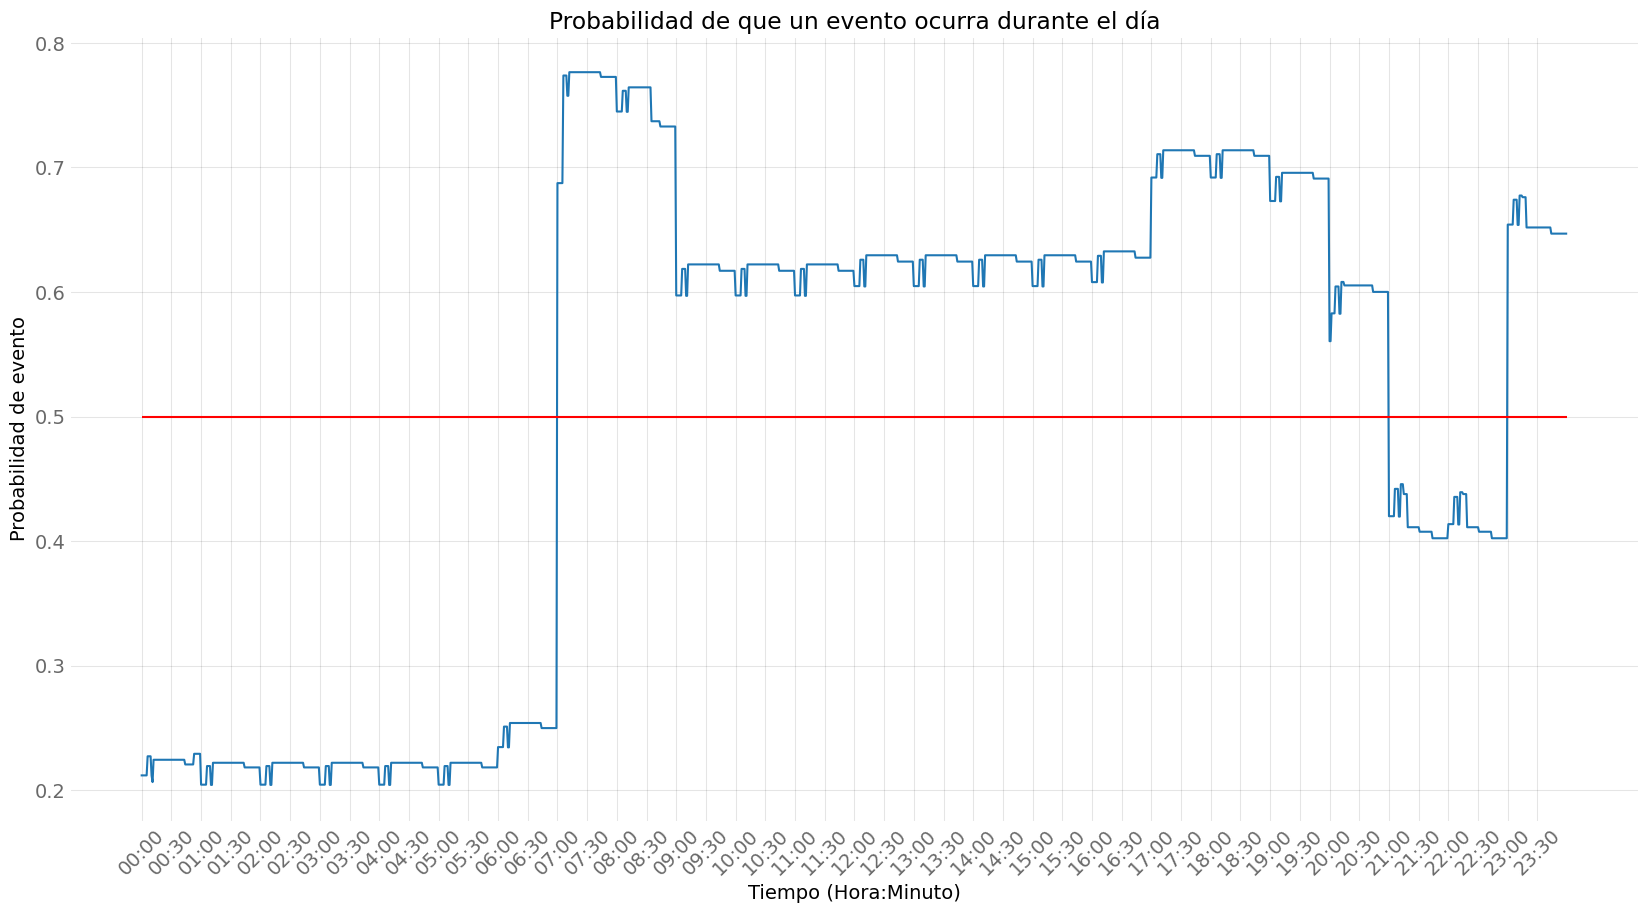

In [82]:
plt.figure(figsize=(16, 8))

# Crear la lista de etiquetas de horas y minutos cada media hora
xticks_labels = [f"{h:02}:{m:02}" for h in range(24) for m in [0, 30]]

# Crear los índices para las etiquetas cada media hora (cada 30 minutos son 2 puntos por hora)
xticks_positions = np.arange(0, len(prob_pred_xgb), 30)

plt.plot(prob_pred_xgb)
plt.hlines(0.5, 0, len(prob_pred_xgb), colors="r")
plt.xticks(xticks_positions, xticks_labels, rotation=45)

# Mostrar el gráfico
plt.xlabel("Tiempo (Hora:Minuto)")
plt.ylabel("Probabilidad de evento")
plt.title("Probabilidad de que un evento ocurra durante el día")
plt.show()